In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Study data files
Atl_2019_crime = "./Resources/2019_CrimeData_ATL.csv"
Atl_2020_crime = "./Resources/2020_Crime_Data_ATL.csv"
covid_data = "./Resources/Georgia_COVID-19 EDITED.csv"
unemployment = "./Resources/GAUR.csv"

In [4]:
crime_may2019 = pd.read_csv(Atl_2019_crime)
crime_may2019.head()

,UC2_Literal,Report Number,Report Date,Location,Beat,Neigborhood,NPU,Lat,Long
0,ROBBERY,191510360,5/31/2019,472 COURTLAND ST NE,509,Downtown,M,33.76763,-84.38419
1,ROBBERY,191511609,5/31/2019,2423 MARTIN L KING JR DR NW,108,Florida Heights,I,33.75183,-84.46623
2,ROBBERY,191511411,5/31/2019,1342 PRYOR RD SW,305,High Point,Y,33.71850,-84.39341
3,AGG ASSAULT,191510268,5/31/2019,151 CLEVELAND AVE SW,310,Browns Mill Park,Z,33.68148,-84.39422
4,AGG ASSAULT,191511544,5/31/2019,1083 EUCLID AVE NE,602,Inman Park,N,33.76323,-84.35155


In [5]:
crime_may2020 = pd.read_csv(Atl_2020_crime)
crime_may2020.head()

,UC2_Literal,Report Number,Report Date,Location,Beat,Neigborhood,NPU,Lat,Long
0,ROBBERY,201520053,5/31/2020,1362 BOULEVARD SE,607.0,Benteen Park,W,33.71744,-84.36818
1,LARCENY-FROM VEHICLE,201520174,5/31/2020,17 BAKER ST NE,509.0,Downtown,M,33.76215,-84.38675
2,BURGLARY,201520199,5/31/2020,1980 DELOWE DR SW,410.0,Campbellton Road,R,33.70106,-84.45698
3,LARCENY-FROM VEHICLE,201520274,5/31/2020,1754 RICHMOND CIR SE,307.0,Lakewood Heights,Y,33.70698,-84.37450
4,AGG ASSAULT,201520296,5/31/2020,991 STONEWALL DR SE,308.0,Leila Valley,Z,33.68995,-84.35680


In [6]:
crime_may2019.columns

Index(['UC2_Literal', 'Report Number', 'Report Date', 'Location', 'Beat',
       'Neigborhood', 'NPU', 'Lat', 'Long'],
      dtype='object')

In [7]:
# clean data
crime_2019_df = crime_may2019.loc[:, ["UC2_Literal","Neigborhood", "Report Date"]]
crime_2019_df.head()

,UC2_Literal,Neigborhood,Report Date
0,ROBBERY,Downtown,5/31/2019
1,ROBBERY,Florida Heights,5/31/2019
2,ROBBERY,High Point,5/31/2019
3,AGG ASSAULT,Browns Mill Park,5/31/2019
4,AGG ASSAULT,Inman Park,5/31/2019


In [8]:
# clean data
crime_2020_df = crime_may2020.loc[:, ["UC2_Literal","Neigborhood", "Report Date"]]
crime_2020_df.head()

,UC2_Literal,Neigborhood,Report Date
0,ROBBERY,Benteen Park,5/31/2020
1,LARCENY-FROM VEHICLE,Downtown,5/31/2020
2,BURGLARY,Campbellton Road,5/31/2020
3,LARCENY-FROM VEHICLE,Lakewood Heights,5/31/2020
4,AGG ASSAULT,Leila Valley,5/31/2020


In [9]:
crime_summary_data_2019 = crime_2019_df 
crime_group_by_neigborhood_2019 = crime_summary_data_2019.groupby(["Neigborhood"])
crime_temp_df_19 = crime_group_by_neigborhood_2019.count()
crime_temp_df_2019 = crime_temp_df_19.loc[:, ["UC2_Literal"]]
crime_temp_df_2019.rename(columns = {'UC2_Literal':'Crimes 2019'}, inplace = True) 
crime_temp_df_2019

,Crimes 2019
Neigborhood,
Adair Park,15
Adams Park,6
Adamsville,32
Almond Park,4
Amal Heights,1
...,...
Wildwood (NPU-H),3
Wilson Mill Meadows,3
Wisteria Gardens,2


In [10]:
crime_summary_data_2020 = crime_2020_df 
crime_group_by_neigborhood_2020 = crime_summary_data_2020.groupby(["Neigborhood"])
crime_temp_df_20 = crime_group_by_neigborhood_2020.count()
crime_temp_df_2020 = crime_temp_df_20.loc[:, ["UC2_Literal"]]
crime_temp_df_2020.rename(columns = {'UC2_Literal':'Crimes 2020'}, inplace = True) 
crime_temp_df_2020

,Crimes 2020
Neigborhood,
Adair Park,112
Adams Park,55
Adamsville,118
Almond Park,28
Ansley Park,28
...,...
Whittier Mill Village,7
Wildwood (NPU-C),56
Wilson Mill Meadows,7


In [11]:
# Merge two dataframes using an outer join
crime_19_20_df = pd.merge(crime_temp_df_2019, crime_temp_df_2020, on="Neigborhood", how="outer")
crime_19_20_df

,Crimes 2019,Crimes 2020
Neigborhood,,
Adair Park,15.0,112.0
Adams Park,6.0,55.0
Adamsville,32.0,118.0
Almond Park,4.0,28.0
Amal Heights,1.0,NaN
...,...,...
Ridgecrest Forest,NaN,7.0
Rue Royal,NaN,7.0
Springlake,NaN,7.0


In [12]:
# Delete N/A
crime_clear = crime_19_20_df.dropna(how='any')
crime_clear

,Crimes 2019,Crimes 2020
Neigborhood,,
Adair Park,15.0,112.0
Adams Park,6.0,55.0
Adamsville,32.0,118.0
Almond Park,4.0,28.0
Ansley Park,3.0,28.0
...,...,...
Whittier Mill Village,3.0,7.0
Wildwood (NPU-C),4.0,56.0
Wilson Mill Meadows,3.0,7.0


In [13]:
covid_df = pd.read_csv(covid_data)
covid_df.head()

,COUNTY,DATE STAMP,FEMALE,MALE,SEX UNKNOWN,SUM CASES
0,NON-GEORGIA RESIDENT,4/16/2020,220,222,69,511
1,NON-GEORGIA RESIDENT,4/17/2020,233,242,72,547
2,NON-GEORGIA RESIDENT,4/18/2020,237,246,77,560
3,NON-GEORGIA RESIDENT,4/19/2020,245,253,83,581
4,NON-GEORGIA RESIDENT,4/20/2020,254,261,91,606


In [14]:
# clean data
# rename colums
covid_2020_df = covid_df.loc[:, ["COUNTY","DATE STAMP", "SUM CASES"]]
covid_2020_df.rename(columns = {'COUNTY':'County','DATE STAMP': 'Report Date', 
                                'SUM CASES': 'Cases'}, inplace = True) 

covid_2020_df.head()

,County,Report Date,Cases
0,NON-GEORGIA RESIDENT,4/16/2020,511
1,NON-GEORGIA RESIDENT,4/17/2020,547
2,NON-GEORGIA RESIDENT,4/18/2020,560
3,NON-GEORGIA RESIDENT,4/19/2020,581
4,NON-GEORGIA RESIDENT,4/20/2020,606


In [15]:
unemployment = pd.read_csv(unemployment)
unemployment

,DATE,%
0,1/1/19,3.8
1,2/1/19,3.7
2,3/1/19,3.7
3,4/1/19,3.6
4,5/1/19,3.6
5,6/1/19,3.5
6,7/1/19,3.4
7,8/1/19,3.3
8,9/1/19,3.2
9,10/1/19,3.2


In [16]:
#Top crimes of May 2019 and May 2020 (total count & overall percentage) - Patrice

#Group by each type of crime and get the number of each crime commited in May 2019 
top_crime_2019 = crime_2019_df.groupby("UC2_Literal").count()["Report Date"]
top_crime_2019

UC2_Literal
AGG ASSAULT             222
AUTO THEFT              286
BURGLARY                284
HOMICIDE                  8
LARCENY-FROM VEHICLE    859
LARCENY-NON VEHICLE     559
ROBBERY                 109
Name: Report Date, dtype: int64

In [17]:
#Group by each type of crime and get the number of each crime commited in May 2020

top_crime_2020 = crime_2020_df.groupby("UC2_Literal").count()["Report Date"]
top_crime_2020

UC2_Literal
AGG ASSAULT             1539
AUTO THEFT              1208
BURGLARY                1732
HOMICIDE                  55
LARCENY-FROM VEHICLE    2140
LARCENY-NON VEHICLE     2259
ROBBERY                  411
Name: Report Date, dtype: int64

<IPython.core.display.Javascript object>


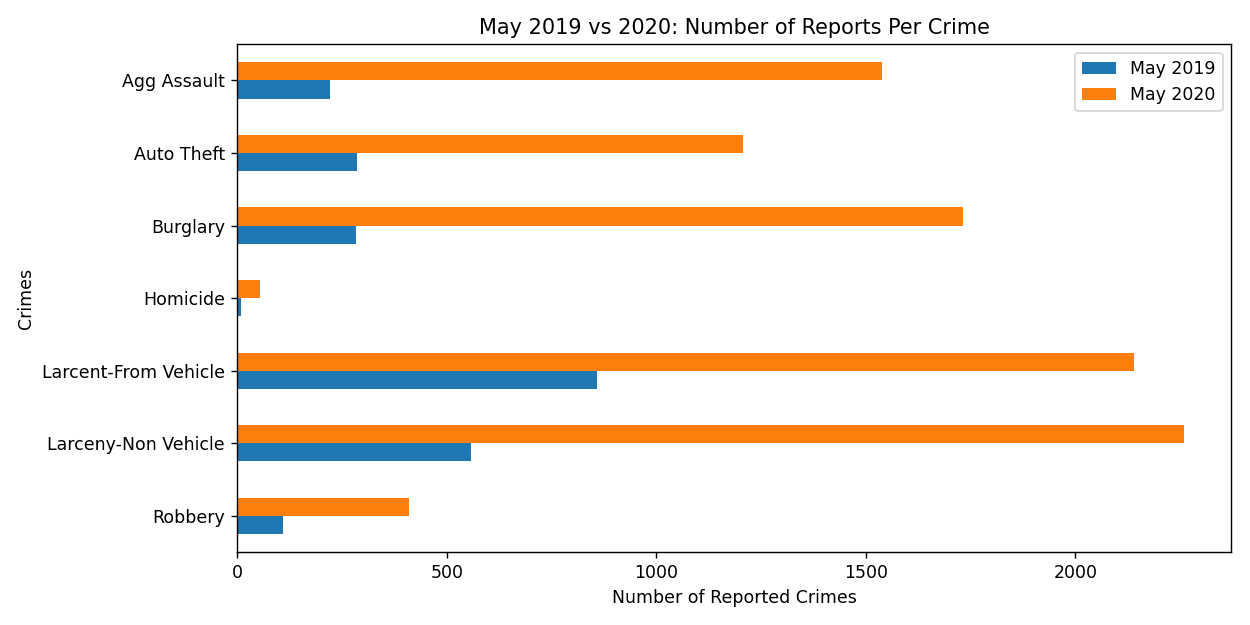

In [18]:
#Total Count
plotdata = pd.DataFrame({
    "May 2019":[109,559,859,8,284,286,222],
    "May 2020":[411,2259,2140,55,1732,1208,1539]}, 
    index=["Robbery", "Larceny-Non Vehicle", "Larcent-From Vehicle", "Homicide",
           "Burglary", "Auto Theft", "Agg Assault"]
)
plotdata.plot(kind="barh", figsize=(10,5))
plt.title("May 2019 vs 2020: Number of Reports Per Crime")
plt.xlabel("Number of Reported Crimes")
plt.ylabel("Crimes")

plt.show()
plt.tight_layout()
plt.savefig("Patrice_images/May 2019 vs 2020: Number of Reports Per Crime.png")

In [19]:
#Top Crimes in 2019 vs 2020

top_2019 = pd.DataFrame(crime_2019_df.groupby(["UC2_Literal"]).count()).reset_index()
top_2019 = top_2019[["UC2_Literal","Report Date"]]
top_2019 = top_2019.rename({"UC2_Literal":"Crimes", "Report Date":"Number of Reports"}, axis=1) 
top_2019 = top_2019.sort_values(by = ['Number of Reports'],ascending = [False])
top_2019 = top_2019.rename_axis('Top Five Crimes of May 2019')
top_2019.reset_index(inplace=True)
top_2019

,Top Five Crimes of May 2019,Crimes,Number of Reports
0,4,LARCENY-FROM VEHICLE,859
1,5,LARCENY-NON VEHICLE,559
2,1,AUTO THEFT,286
3,2,BURGLARY,284
4,0,AGG ASSAULT,222
5,6,ROBBERY,109
6,3,HOMICIDE,8


In [20]:
top_2020 = pd.DataFrame(crime_2020_df.groupby(["UC2_Literal"]).count()).reset_index()
top_2020 = top_2020[["UC2_Literal","Report Date"]]
top_2020 = top_2020.rename({"UC2_Literal":"Crimes", "Report Date":"Number of Reports"}, axis=1)
top_2020 = top_2020.sort_values(by = ['Number of Reports'],ascending=[False])
top_2020 = top_2020.rename_axis('Top Five Crimes of May 2020')
top_2020.reset_index(inplace=True)
top_2020

,Top Five Crimes of May 2020,Crimes,Number of Reports
0,5,LARCENY-NON VEHICLE,2259
1,4,LARCENY-FROM VEHICLE,2140
2,2,BURGLARY,1732
3,0,AGG ASSAULT,1539
4,1,AUTO THEFT,1208
5,6,ROBBERY,411
6,3,HOMICIDE,55


<IPython.core.display.Javascript object>


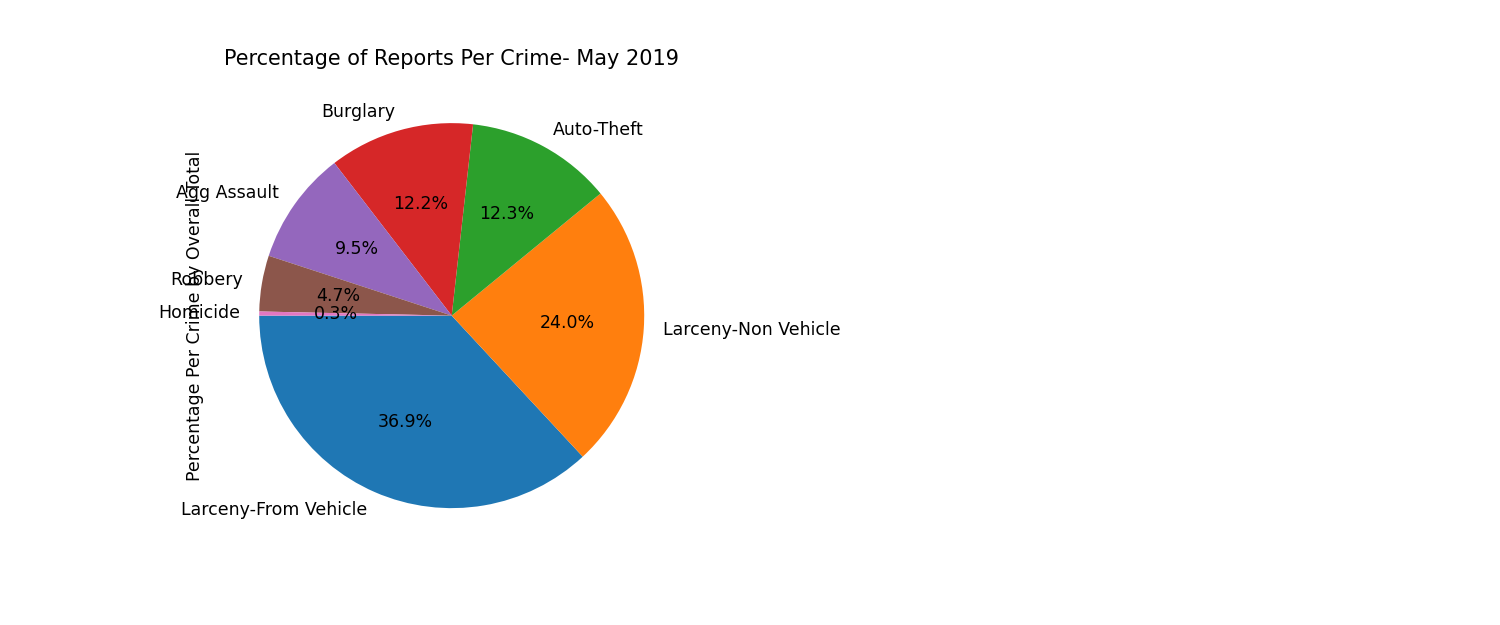

In [21]:
#Overall Percentage for May 2019/2020

plt.figure(figsize=(12,5))
ax1 = plt.subplot(121, aspect='equal')
crime_pie_2019 = top_2019.plot(kind="pie", y="Number of Reports",ax=ax1, autopct='%1.1f%%', 
 startangle=180, shadow=False, labels=["Larceny-From Vehicle", "Larceny-Non Vehicle", "Auto-Theft", "Burglary",
           "Agg Assault", "Robbery", "Homicide"], legend = False, fontsize=10)
crime_pie_2019
plt.title("Percentage of Reports Per Crime- May 2019")
plt.ylabel("Percentage Per Crime by Overall Total")
plt.savefig("Patrice_images/Percentage of Reports Per Crime- May 2019.png")

<IPython.core.display.Javascript object>


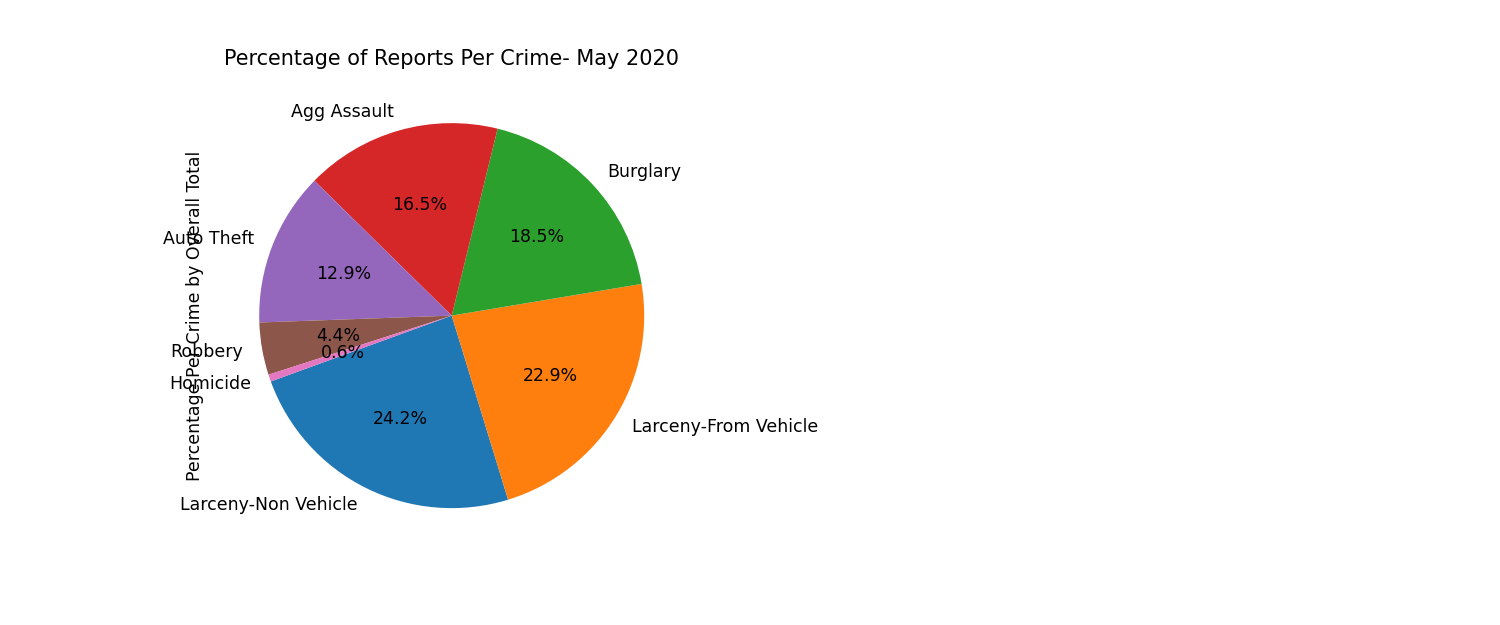

In [22]:
plt.figure(figsize=(12,5))
ax1 = plt.subplot(121, aspect='equal')
crime_pie_2020 = top_2020.plot(kind="pie", y="Number of Reports",ax=ax1, autopct='%1.1f%%', 
 startangle=200, shadow=False, labels=["Larceny-Non Vehicle", "Larceny-From Vehicle", "Burglary", "Agg Assault",
           "Auto Theft", "Robbery", "Homicide"], legend = False, fontsize=10)
crime_pie_2020
plt.title("Percentage of Reports Per Crime- May 2020")
plt.ylabel("Percentage Per Crime by Overall Total")
plt.savefig("Patrice_images/Percentage of Reports Per Crime- May 2020.png")